In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ev-datasets/EV Datasets/indian-auto-mpg.csv
/kaggle/input/ev-datasets/EV Datasets/EV Stats-1.csv
/kaggle/input/ev-datasets/EV Datasets/usedcar.xlsx
/kaggle/input/ev-datasets/EV Datasets/RS_Session_256_AU_95_C.csv
/kaggle/input/ev-datasets/EV Datasets/ElectricCarData_Norm.csv
/kaggle/input/ev-datasets/EV Datasets/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/indian-consumers-cars-purchasing-behaviour/Indian automoble buying behavour study 1.0.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/indian-consumers-cars-purchasing-behaviour/Indian automoble buying behavour study 1.0.csv')
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
cat_cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']

In [4]:
df1['Make'].unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Luxuray', 'Creata'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<Figure size 2000x1000 with 0 Axes>

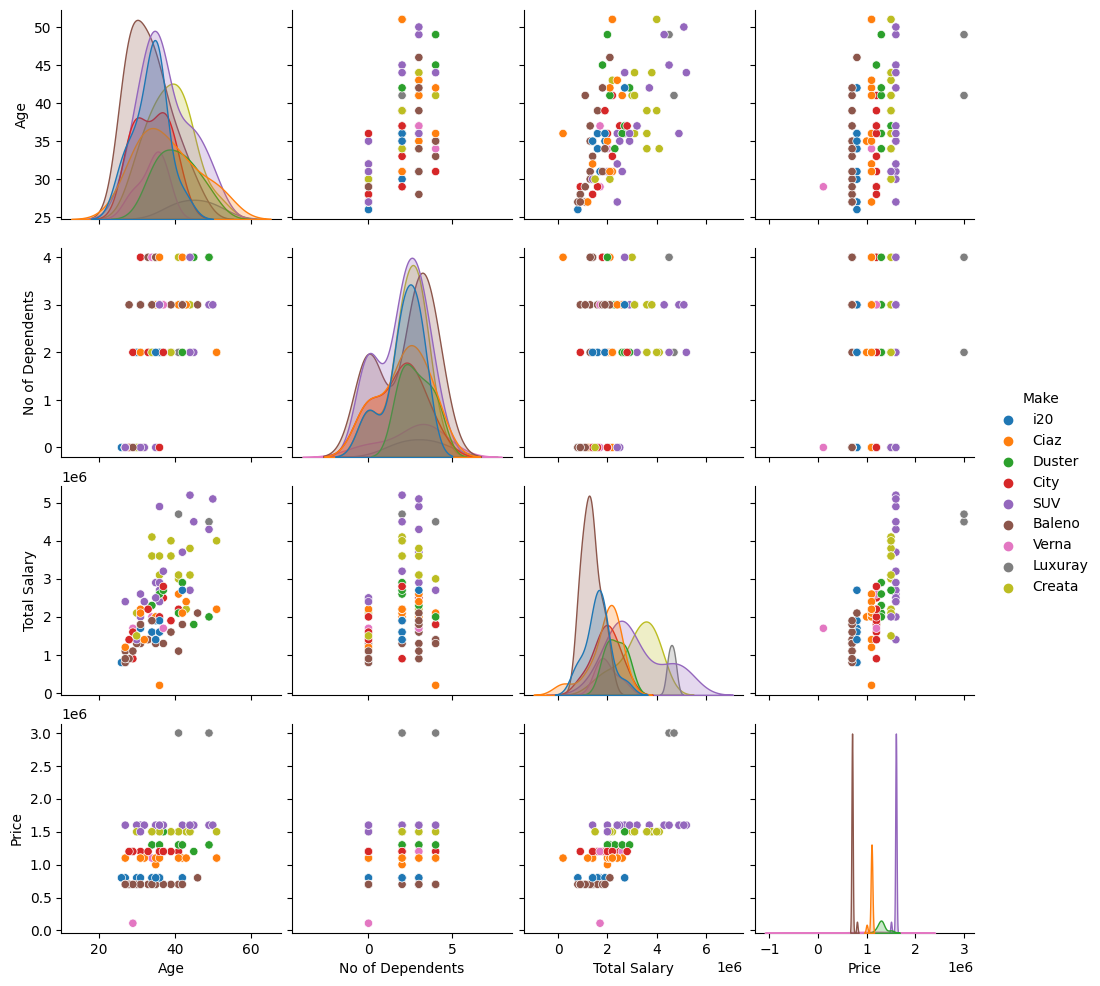

In [6]:
figure = plt.figure(figsize=(20,10))
sns.pairplot(df1[['Age', 'No of Dependents', 'Total Salary', 'Price', 'Make']], hue='Make')
plt.show()

In [7]:
def make_labels(col):
    l = list(df1[col].unique())
    d = {}
    for i, e in enumerate(l):
        d[e] = i
    return d

In [8]:
dict_cols = {}

In [9]:
for col in cat_cols:
    dict_cols[col] = make_labels(col)
    df1[col] = df1[col].map(dict_cols[col])

In [10]:
dict_cols

{'Profession': {'Salaried': 0, 'Business': 1},
 'Marrital Status': {'Single': 0, 'Married': 1},
 'Education': {'Post Graduate': 0, 'Graduate': 1},
 'Personal loan': {'Yes': 0, 'No': 1},
 'House Loan': {'No': 0, 'Yes': 1},
 'Wife Working': {'No': 0, 'Yes': 1, 'm': 2},
 'Make': {'i20': 0,
  'Ciaz': 1,
  'Duster': 2,
  'City': 3,
  'SUV': 4,
  'Baleno': 5,
  'Verna': 6,
  'Luxuray': 7,
  'Creata': 8}}

In [11]:
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,0,0,0,800000,0,800000,0,800000
1,35,0,1,0,2,0,1,1,1400000,600000,2000000,1,1000000
2,45,1,1,1,4,0,1,0,1800000,0,1800000,2,1200000
3,41,1,1,0,3,1,0,1,1600000,600000,2200000,3,1200000
4,31,0,1,0,2,0,0,1,1800000,800000,2600000,4,1600000


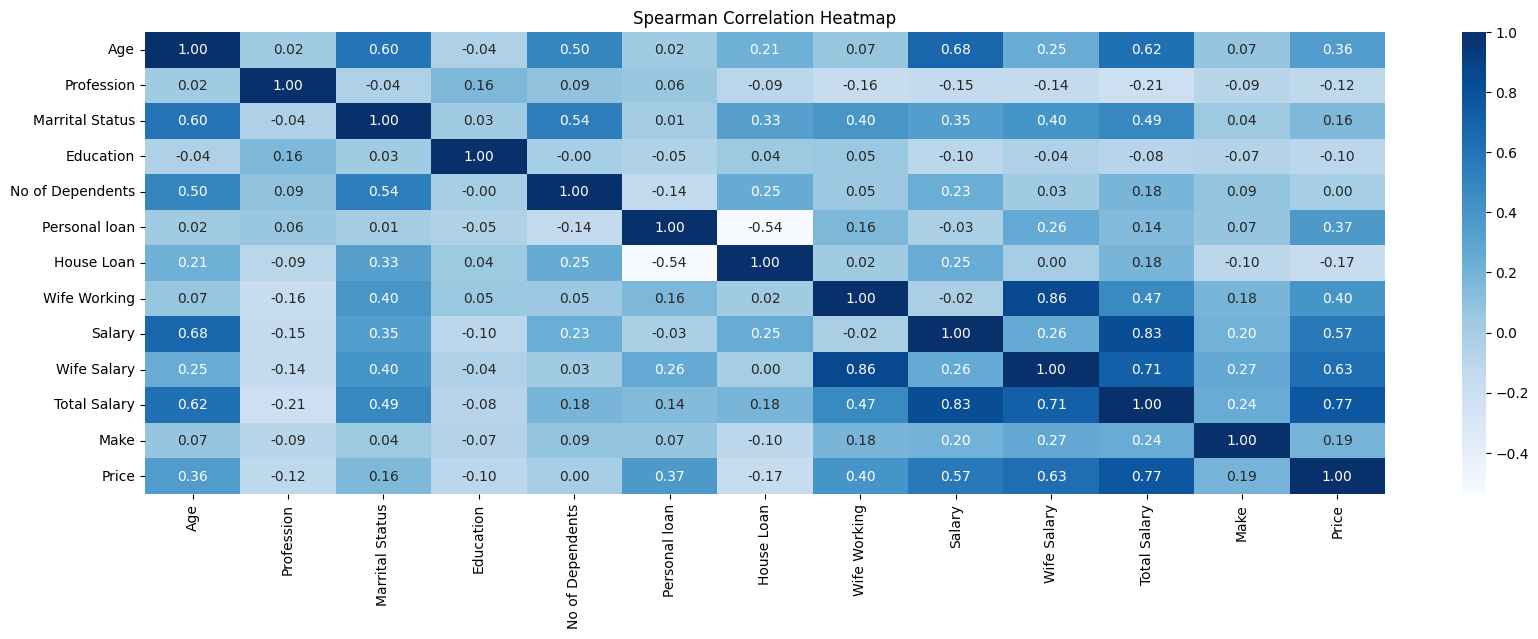

In [12]:
corr = df1.corr(method = 'spearman',numeric_only=False)
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Spearman Correlation Heatmap')
plt.show()

In [13]:
# figure = plt.figure(figsize=(20,10))
# sns.pairplot(df1, hue='Price', palette='GnBu')
# plt.show()

In [14]:
df_attr = df1.loc[:, 'Age':'Wife Working']
df_attr.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working
0,27,0,0,0,0,0,0,0
1,35,0,1,0,2,0,1,1
2,45,1,1,1,4,0,1,0
3,41,1,1,0,3,1,0,1
4,31,0,1,0,2,0,0,1


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=8)
pca.fit(df_attr)

PCA(n_components=8)

In [17]:
df_pca = pd.DataFrame(pca.components_.T, columns = [i for i in range(1, 9)], index = df_attr.columns)
df_pca.applymap(lambda x: f"{x:0.2f}")

,1,2,3,4,5,6,7,8
Age,0.99,-0.12,0.01,-0.00,0.01,-0.00,-0.01,-0.01
Profession,0.00,0.03,-0.03,-0.57,0.38,0.73,-0.03,-0.01
Marrital Status,0.03,0.12,-0.11,0.21,0.10,0.12,0.24,0.92
Education,-0.01,0.02,0.02,-0.06,0.87,-0.49,0.02,-0.02
No of Dependents,0.12,0.97,-0.11,-0.11,-0.08,-0.09,-0.04,-0.09
Personal loan,0.00,-0.10,-0.66,-0.18,-0.07,-0.10,0.69,-0.19
House Loan,0.01,0.14,0.55,0.36,0.13,0.25,0.63,-0.25
Wife Working,0.00,0.05,-0.48,0.67,0.26,0.36,-0.26,-0.23


In [18]:
col_names = [f"PC-{i}" for i in range(1,9)]
row_names = ["Standard Deviation", "Proportion of Variance", "Cumilative Proportion"]
data = [pca.explained_variance_, pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)]

In [19]:
df_summary = pd.DataFrame(data, row_names, col_names)
df_summary = df_summary.applymap(lambda x: f"{x:0.2f}")
df_summary

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
Standard Deviation,39.61,1.29,0.33,0.31,0.27,0.17,0.10,0.05
Proportion of Variance,0.94,0.03,0.01,0.01,0.01,0.00,0.00,0.00
Cumilative Proportion,0.94,0.97,0.98,0.99,0.99,1.00,1.00,1.00


In [20]:
import plotly.express as px

In [21]:
components = pca.fit_transform(df_attr)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [22]:
fig = px.scatter(components, x=0, y=1, labels={"0": "PC-1", "1":"PC-2"})

In [23]:
fig.show()

In [24]:
for i, feature in enumerate(list(df_attr.columns)):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
sse = []
for i in range(1, 9):
    km = KMeans(n_clusters=i, n_init = 10)
    km.fit(df_attr)
    sse.append(km.inertia_)

In [27]:
df_km = pd.DataFrame({'I': [i for i in range(1,9)], 'WCSS': sse})

In [28]:
fig2 = px.line(df_km, x="I", y="WCSS")
fig2.show()

In [29]:
km = KMeans(n_clusters = 4, n_init = 10)

In [30]:
df_km4 = PCA(n_components=2).fit_transform(df_attr)

In [31]:
y_predicted = km.fit_predict(df_km4)

In [32]:
fig3 = px.scatter(df_km4, x=0, y=1, color=y_predicted)

In [33]:
for i, feature in enumerate(list(df_attr.columns)):
    fig3.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig3.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=10,
    )
fig3.show()

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram

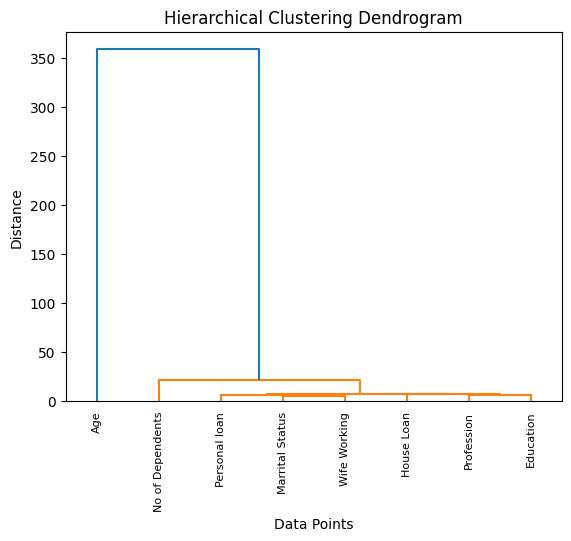

In [35]:
dig = linkage(df_attr.T, method='average', metric='euclidean')
dendrogram(dig, labels=df_attr.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [36]:
df_mosaic = pd.DataFrame({'Cluster': y_predicted})
df_mosaic['Like'] = df1['Make']

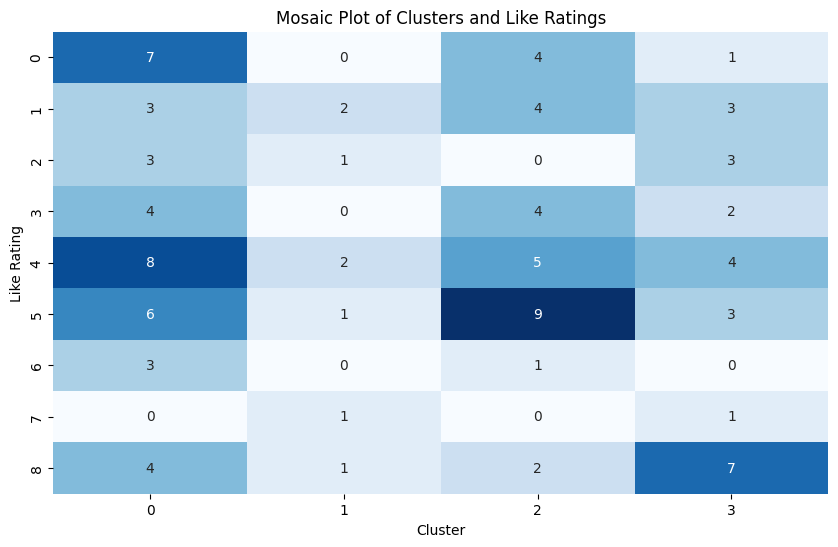

In [37]:
plt.figure(figsize=(10, 6))
mosaic_data = pd.crosstab(df_mosaic['Like'], df_mosaic['Cluster'])
sns.heatmap(mosaic_data, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Mosaic Plot of Clusters and Like Ratings')
plt.ylabel('Like Rating')
plt.xlabel('Cluster')
plt.show()

In [38]:
df_mosaic['Total Salary'] = df1['Total Salary']
df_mosaic['Age'] = df1['Age']
df_mosaic['No of dependents'] = df1["No of Dependents"]

In [39]:
df_mosaic['Price'] = df1['Price']

In [40]:
price_means = df_mosaic.groupby('Like')['Price'].mean()
print(price_means)

Like
0    8.000000e+05
1    1.091667e+06
2    1.314286e+06
3    1.200000e+06
4    1.594737e+06
5    7.052632e+05
6    9.025000e+05
7    3.000000e+06
8    1.500000e+06
Name: Price, dtype: float64


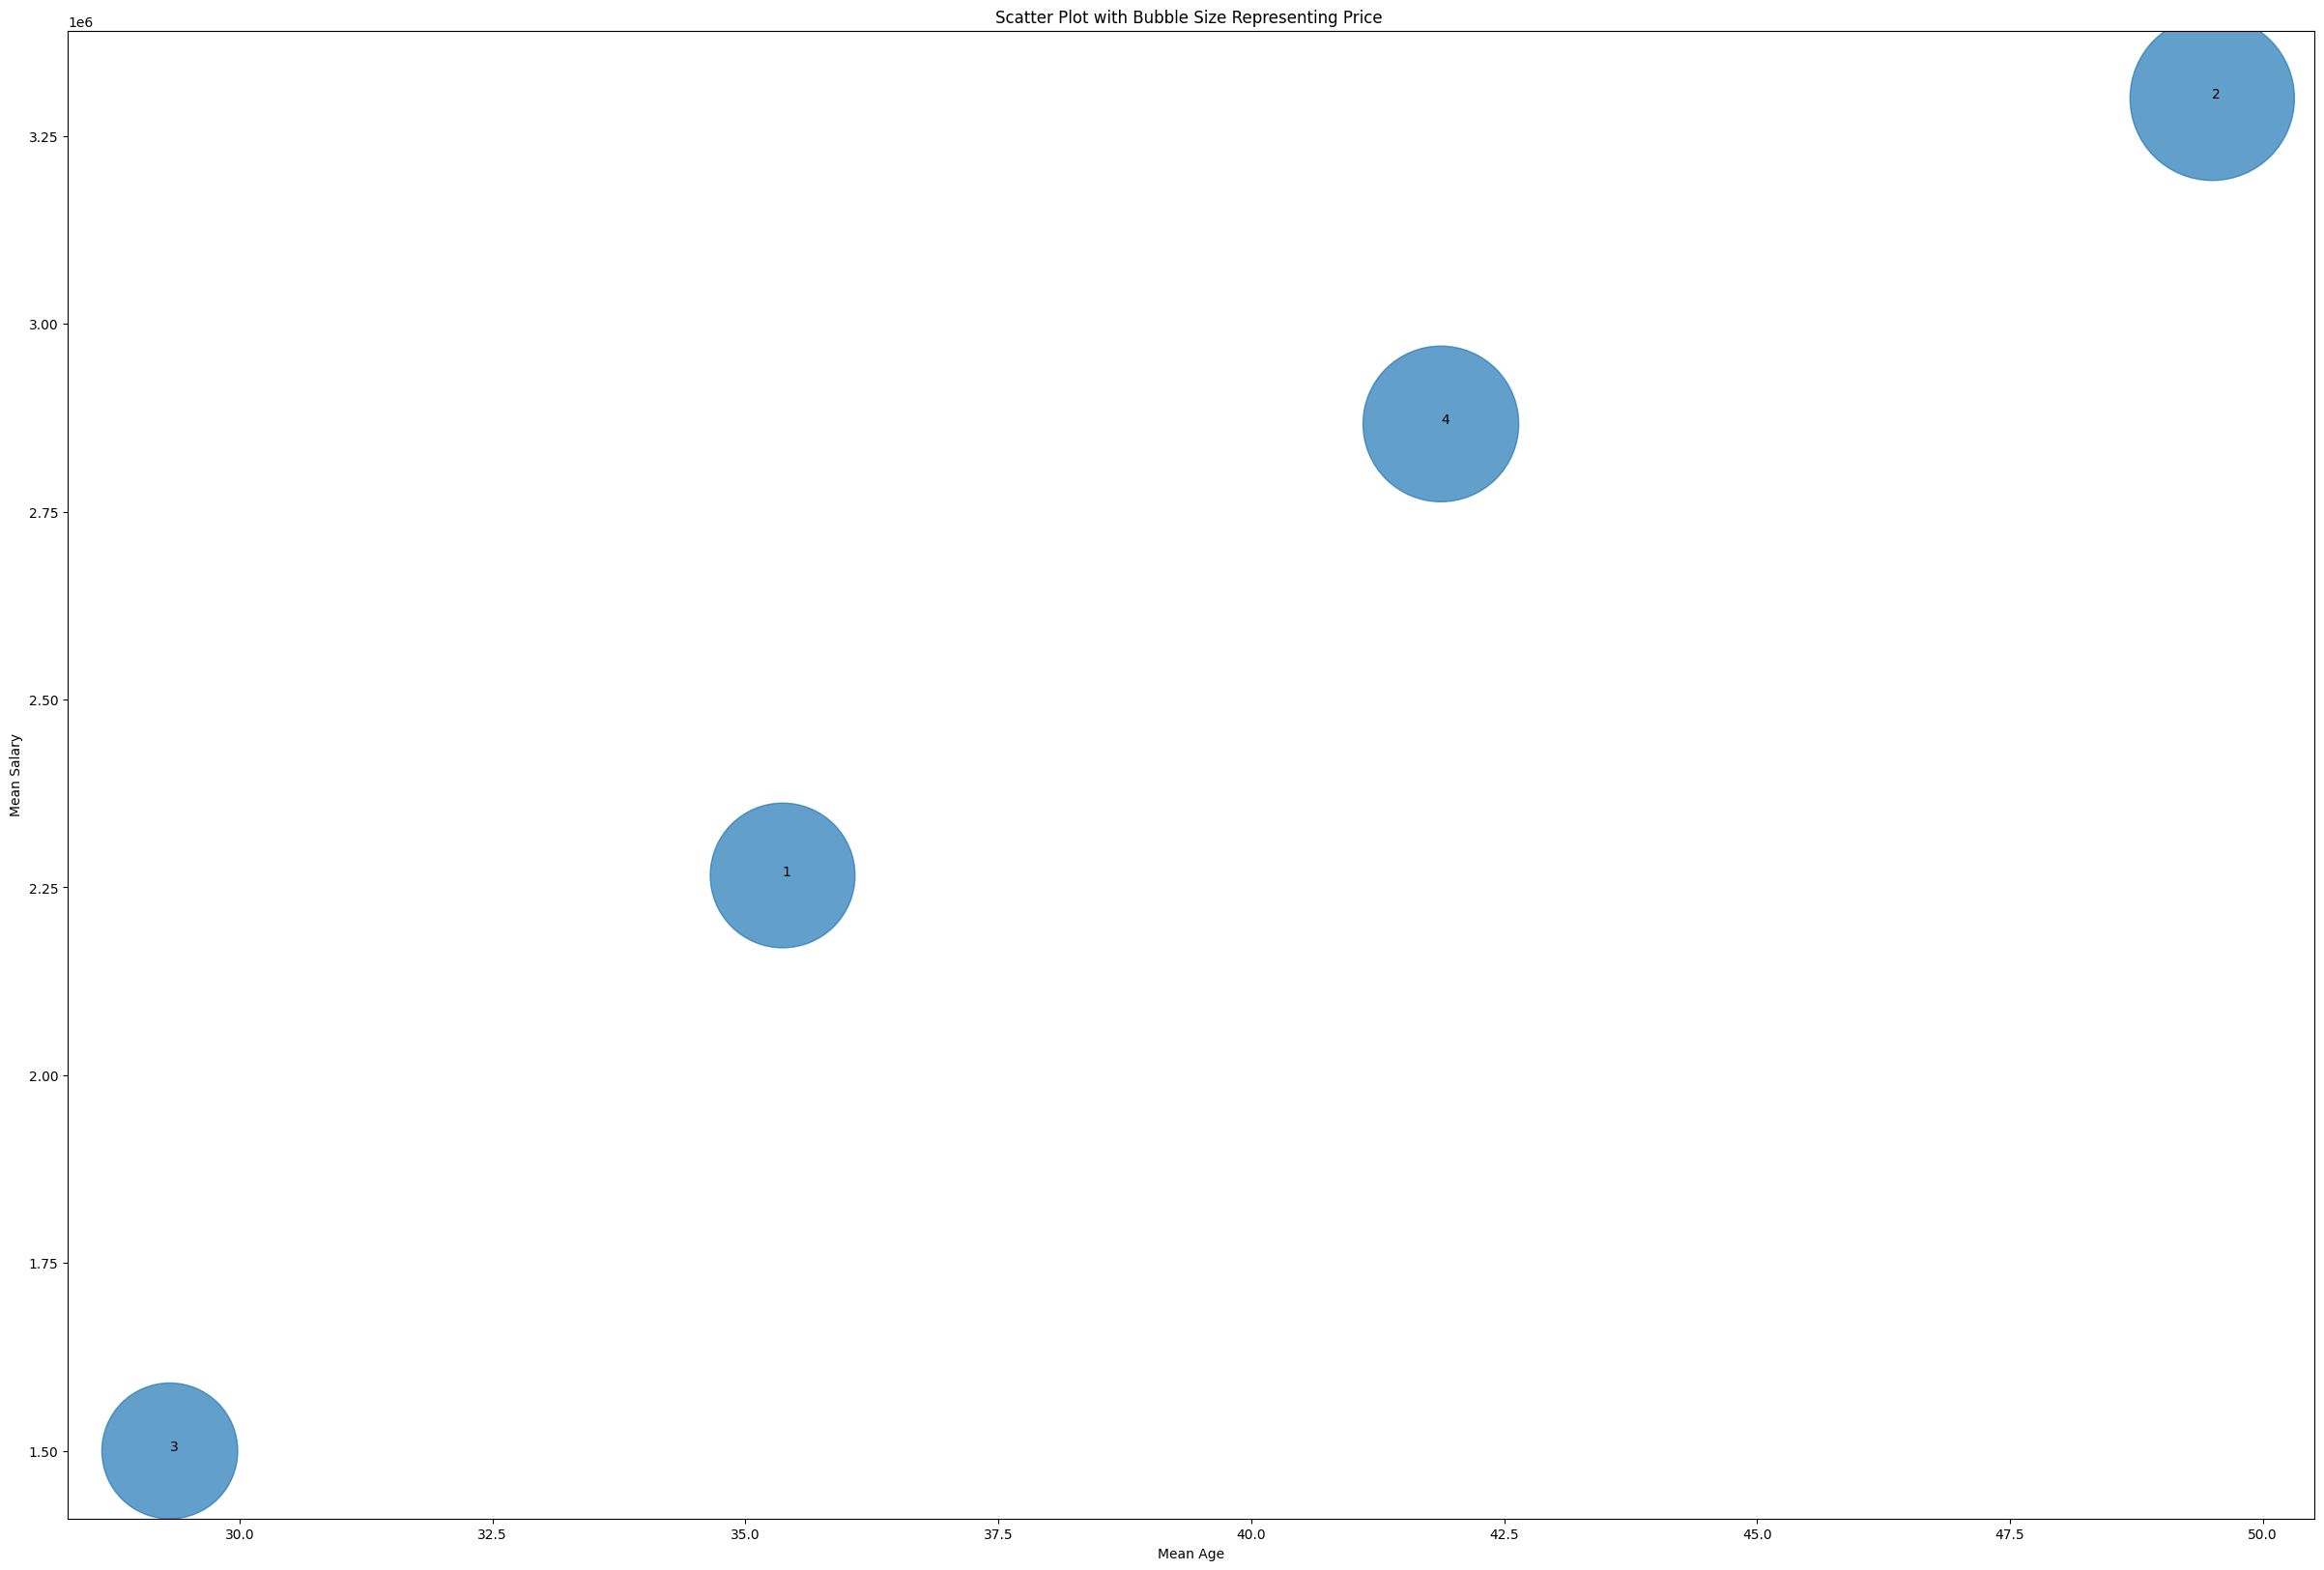

In [41]:
visit_means = df_mosaic.groupby('Cluster')['Age'].mean()
like_means = df_mosaic.groupby('Cluster')['Total Salary'].mean()
female_means = df_mosaic.groupby('Cluster')['Price'].mean()

# Create a scatter plot
plt.figure(figsize=(30, 20))
plt.scatter(visit_means, like_means, s= 0.01 * female_means, alpha=0.7)


# Add labels to points
for i, txt in enumerate(range(1, 5)):
    plt.text(visit_means[i], like_means[i], str(txt))

# Add labels and title
plt.xlabel('Mean Age')
plt.ylabel('Mean Salary')
plt.title('Scatter Plot with Bubble Size Representing Price ')

plt.show()

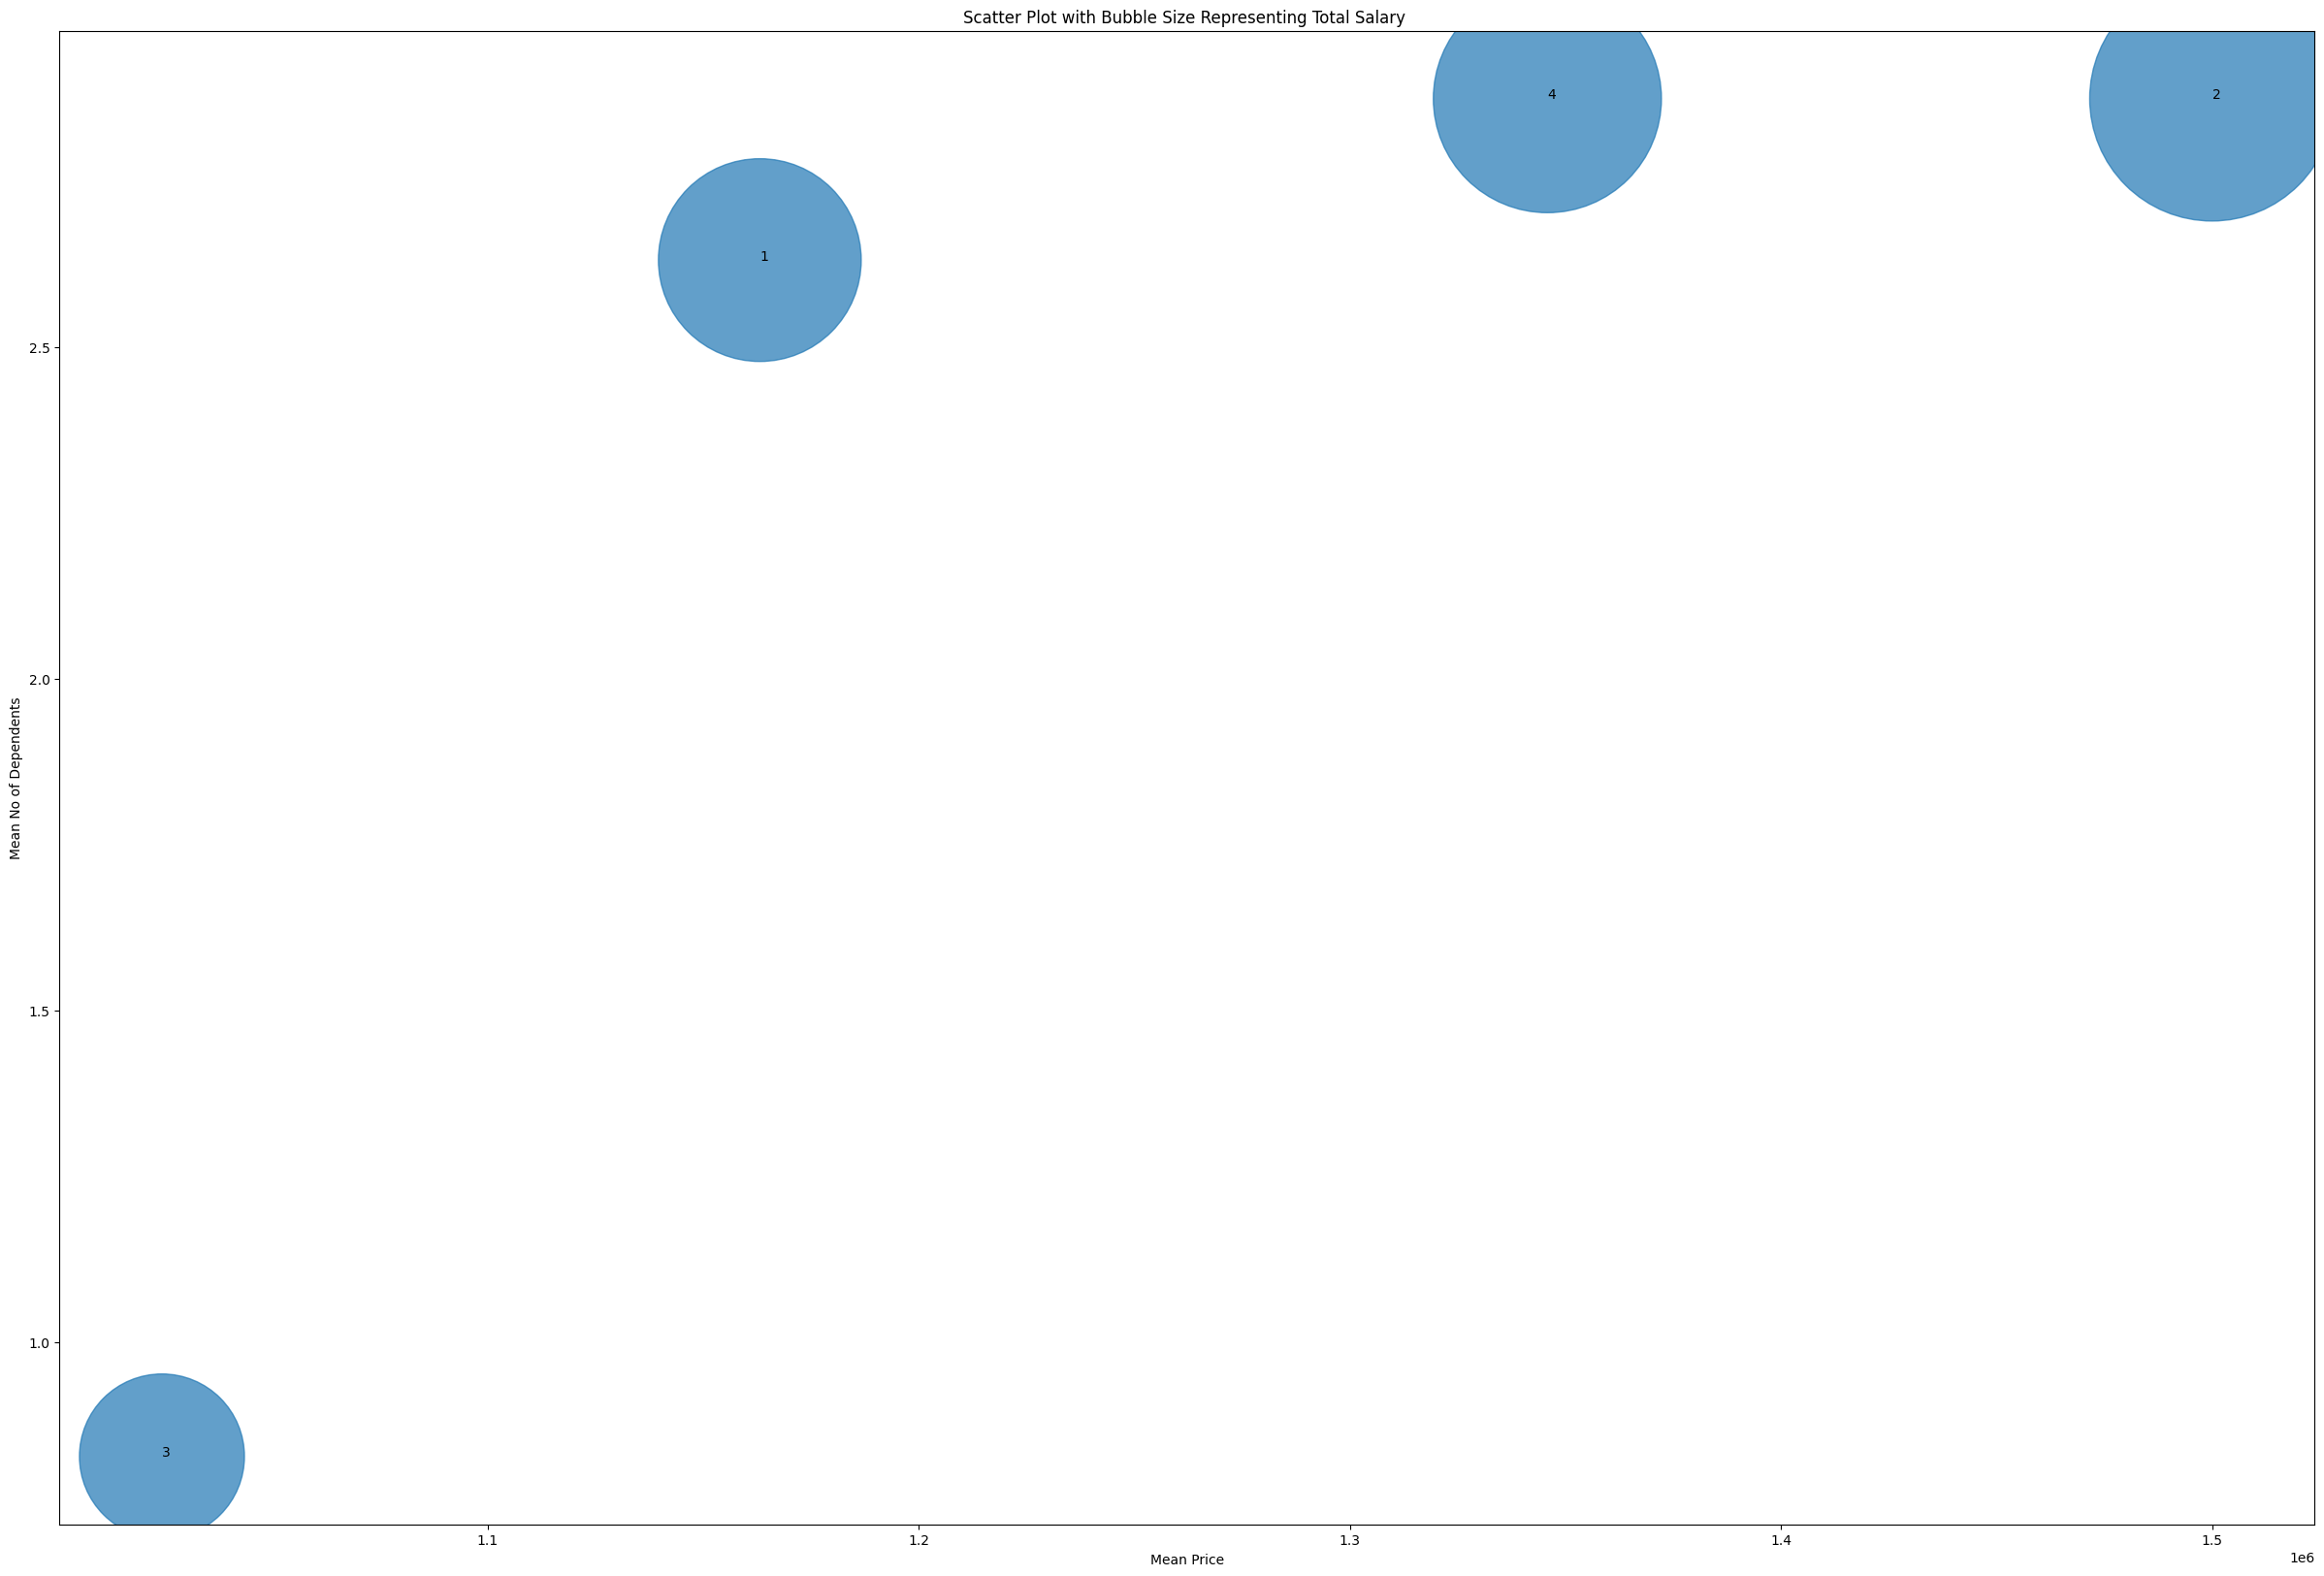

In [42]:
visit_means = df_mosaic.groupby('Cluster')['Total Salary'].mean()
like_means = df_mosaic.groupby('Cluster')['No of dependents'].mean()
female_means = df_mosaic.groupby('Cluster')['Price'].mean()

# Create a scatter plot
plt.figure(figsize=(30, 20))
plt.scatter(female_means, like_means, s= 0.01 * visit_means, alpha=0.7)


# Add labels to points
for i, txt in enumerate(range(1, 5)):
    plt.text(female_means[i], like_means[i], str(txt))

# Add labels and title
plt.xlabel('Mean Price')
plt.ylabel('Mean No of Dependents')
plt.title('Scatter Plot with Bubble Size Representing Total Salary ')

plt.show()

In [53]:
df2 = pd.read_csv("/kaggle/input/ev-datasets/EV Datasets/EV Stats-1.csv")

In [54]:
df2.head(35)

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0
5,6,Goa,0.0,0.0,0.0,0,0.0,513.0,1.0,514.0
6,7,Gujarat,7182.0,217.0,8476.0,0,4.0,15388.0,0.0,31267.0
7,8,Haryana,3162.0,1504.0,13908.0,113,24.0,4878.0,0.0,23589.0
8,9,Himachal Pradesh,0.0,0.0,0.0,0,0.0,98.0,0.0,98.0
9,10,Jammu & Kashmir,2.0,76.0,152.0,0,0.0,208.0,0.0,438.0


In [55]:
df2 = df2.dropna()

In [56]:
list(df2['Total in state'])

[9492.0,
 1875.0,
 3171.0,
 4234.0,
 19381.0,
 514.0,
 31267.0,
 23589.0,
 98.0,
 438.0,
 1710.0,
 13386.0,
 11202.0,
 6461.0,
 34013.0,
 52.0,
 6.0,
 24.0,
 3863.0,
 6538.0,
 15763.0,
 16746.0,
 9034.0,
 81.0,
 26209.0,
 4178.0,
 14140.0,
 82.0,
 2500.0,
 816.0,
 260863.0]

In [57]:
States = []
Number = []

In [58]:
tot = 0
for a, b in zip(list(df2['Total in state'])[:-1], list(df2['State'])[:-1]):
    if a*100/260863 >= 5:
        States.append(b)
        Number.append(a)
    else:
        tot += a
States.append("Rest of India")
Number.append(tot)

In [59]:
res = sorted(zip(Number, States), key= lambda x: x[0], reverse=True)
Number, States = zip(*res)

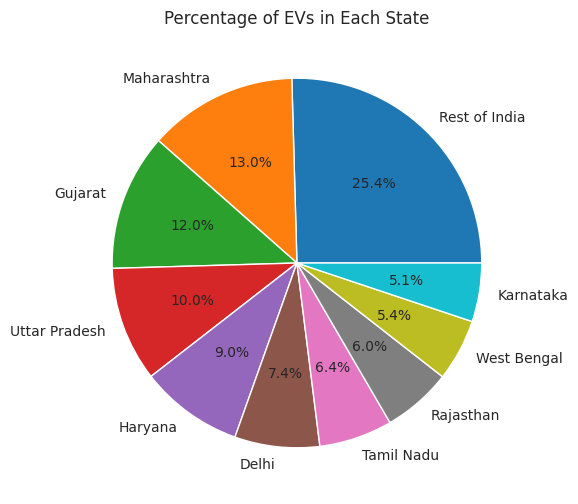

In [60]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(Number, labels=States,autopct='%1.1f%%')

# Add a title
plt.title("Percentage of EVs in Each State")

# Display the plot
plt.show()

In [84]:
vl = df2.iloc[30,:]
# print(list(vl))

li = ['Two Wheelers(L1 and L2)', 'Two Wheelers L2 (CMVR)', 'Two Wheelers (<250 Watts)', 'Three Wheelers(L5 Slow)', 'Three Wheelers(L5)', 'Passenger Cars', 'Buses']
vl = [int(i) for i in vl[2:-1]]

In [85]:
res = sorted(zip(vl, li), key= lambda x: x[0], reverse=True)
vl, li = zip(*res)

In [86]:
vl[-3:]

(720, 389, 27)

In [87]:
oth = sum(vl[-3:])
print(oth)

1136


In [88]:
vl = list(vl[:-3])
print(vl)

[112538, 105571, 27549, 14069]


In [89]:
vl.append(oth)
print(vl)
li = list(li[:-3])
li.append('Others')

[112538, 105571, 27549, 14069, 1136]


In [90]:
print(vl, li)

[112538, 105571, 27549, 14069, 1136] ['Two Wheelers (<250 Watts)', 'Passenger Cars', 'Two Wheelers(L1 and L2)', 'Two Wheelers L2 (CMVR)', 'Others']


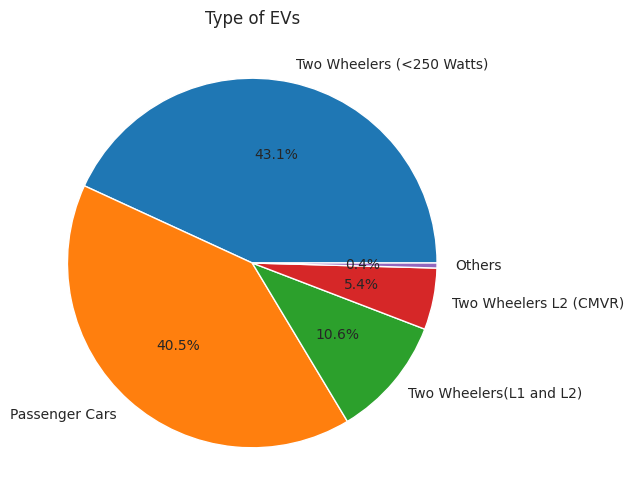

In [91]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(vl, labels=li,autopct='%1.1f%%')

# Add a title
plt.title("Type of EVs")

# Display the plot
plt.show()